In [1]:
import torch

from data import data_helper
from data.data_helper import available_datasets
from models import model_factory
from optimizer.optimizer_helper import get_optim_and_scheduler
from torch.nn import functional as F
from torch import nn

from utils.Logger import Logger

import torchvision
import matplotlib.pyplot as plt

# from train_jigsaw import do_training
from utils import vis

class Container():
    pass

args = Container()
args.batch_size = 128
args.jigsaw_n_classes = 31
args.n_classes = 7
args.learning_rate = 0.001
args.epochs = 30
args.source = ["art_painting", "photo", "cartoon"]
args.target = "sketch" # source[target_id]
args.network = "caffenet"
args.jig_weight = 0.2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
from train_jigsaw import Trainer

trainer = Trainer(args, device)
logger, model = trainer.do_training()

Using Caffe AlexNet
AlexNetCaffe(
  (features): Sequential(
    (conv1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (relu1): ReLU(inplace)
    (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (norm1): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=1)
    (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), groups=2)
    (relu2): ReLU(inplace)
    (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (norm2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=1)
    (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU(inplace)
    (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=2)
    (relu4): ReLU(inplace)
    (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=2)
    (relu5): ReLU(inplace)
    (pool5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)

40/47 of epoch 11/30 jigsaw : 2.915972, class : 0.610059 - acc jigsaw : 0.171875, class : 0.789062 [bs:128]
Accuracies on target: jigsaw : 0.707050, class : 0.423517
New epoch - lr: 0.0, 0.001
0/47 of epoch 12/30 jigsaw : 2.766494, class : 0.509625 - acc jigsaw : 0.210938, class : 0.820312 [bs:128]
10/47 of epoch 12/30 jigsaw : 2.892622, class : 0.783784 - acc jigsaw : 0.156250, class : 0.757812 [bs:128]
20/47 of epoch 12/30 jigsaw : 2.858061, class : 0.509620 - acc jigsaw : 0.203125, class : 0.820312 [bs:128]
30/47 of epoch 12/30 jigsaw : 2.777749, class : 0.560517 - acc jigsaw : 0.257812, class : 0.789062 [bs:128]
40/47 of epoch 12/30 jigsaw : 2.844362, class : 0.590955 - acc jigsaw : 0.242188, class : 0.765625 [bs:128]
Accuracies on target: jigsaw : 0.738356, class : 0.446170
New epoch - lr: 0.0, 0.001
0/47 of epoch 13/30 jigsaw : 2.795146, class : 0.619133 - acc jigsaw : 0.203125, class : 0.781250 [bs:128]
10/47 of epoch 13/30 jigsaw : 2.829160, class : 0.630374 - acc jigsaw : 0.24

Accuracies on target: jigsaw : 0.664800, class : 0.446679
New epoch - lr: 0.0, 0.0001
0/47 of epoch 25/30 jigsaw : 2.197923, class : 0.427199 - acc jigsaw : 0.382812, class : 0.835938 [bs:128]
10/47 of epoch 25/30 jigsaw : 2.298518, class : 0.679524 - acc jigsaw : 0.328125, class : 0.781250 [bs:128]
20/47 of epoch 25/30 jigsaw : 2.262042, class : 0.484372 - acc jigsaw : 0.390625, class : 0.789062 [bs:128]
30/47 of epoch 25/30 jigsaw : 2.237087, class : 0.422018 - acc jigsaw : 0.382812, class : 0.843750 [bs:128]
40/47 of epoch 25/30 jigsaw : 2.215078, class : 0.544177 - acc jigsaw : 0.390625, class : 0.804688 [bs:128]
Accuracies on target: jigsaw : 0.675235, class : 0.453041
New epoch - lr: 0.0, 0.0001
0/47 of epoch 26/30 jigsaw : 2.151064, class : 0.485445 - acc jigsaw : 0.367188, class : 0.820312 [bs:128]
10/47 of epoch 26/30 jigsaw : 2.188835, class : 0.561115 - acc jigsaw : 0.421875, class : 0.812500 [bs:128]
20/47 of epoch 26/30 jigsaw : 2.277487, class : 0.491842 - acc jigsaw : 0.

45.64774751845253


<IPython.core.display.Javascript object>


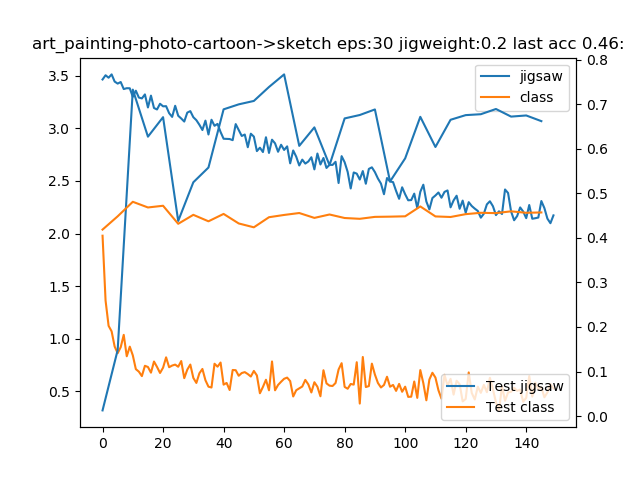

In [3]:
%matplotlib notebook
print(100*(logger.val_acc["class"][-1] + logger.val_acc["class"][-2])/2.)
vis.view_training(logger, "%s->%s eps:%d jigweight:%.1f" % ("-".join(args.source),
                                                            args.target,args.epochs, args.jig_weight))

In [ ]:
fig, ax1 = plt.subplots()
for k,v in logger.losses.items():
    ax1.plot(v, label=k)
    l = len(v)
updates = l / len(logger.val_acc)
print(updates)
plt.legend()
ax2 = ax1.twinx()
ax2.plot(range(0,l,int(updates)), logger.val_acc, label="Test acc", c='g')
plt.legend()
plt.title("%s->%s eps:%d jigweight:%.2f" % (str(source),target,epochs, jig_weight))
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
for k,v in logger.losses.items():
    ax1.plot(v, label=k)
    l = len(v)
updates = l / len(logger.val_acc)
print(updates)
plt.legend()
ax2 = ax1.twinx()
ax2.plot(range(0,l,int(updates)), logger.val_acc, label="Test acc", c='g')
plt.legend()
plt.show()

In [ ]:
def to_plt(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    return inp

conv1 = models.alexnet(pretrained=True).features[0] #model_ft.features[0]
tmp = conv1.weight.cpu().data
tmp = torchvision.utils.make_grid(tmp,normalize=True)
plt.imshow(to_plt(tmp))
plt.show()

In [ ]:
import numpy as np

conv1 = model_ft.features[0]
tmp = conv1.weight.cpu().data
tmp = torchvision.utils.make_grid(tmp,normalize=True)
plt.imshow(to_plt(tmp))
plt.show()

In [ ]:
plt.plot(memory["train"], label="train")
plt.plot(memory["val"], label="val")
plt.show()

In [ ]:



# iter_c = iter(train_datasets)

# for x in range(5):
#     tmp = next(iter_c)
#     image = to_plt(tmp[0])
#     plt.imshow(image)
#     plt.show()

In [ ]:
from os.path import join, dirname
# from data.JigsawLoader import JigsawTestDataset
import torch
import matplotlib.pyplot as plt
import numpy as np


def to_plt(inp):
    inp = inp.numpy().transpose((1, 2, 0))
#     mean = np.array([0.485, 0.456, 0.406])
#     std = np.array([0.229, 0.224, 0.225])
#     inp = std * inp + mean
#     inp = np.clip(inp, 0, 1)
    return inp

# dataset = JigsawTestDataset("", join('data/txt_lists', 'dslr_train.txt'), patches=False, classes=31)
# test = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True, drop_last=False)
iter_c = iter(data_helper.get_dataloader("photo", 31, "train"))
(tmp, v, c), d = next(iter_c)
for x in range(10):
    image = tmp[x]
    image = torchvision.utils.make_grid(tmp[x],1,normalize=True)
    plt.imshow(to_plt(image))
    plt.show()
    print(v[x],c[x])
    
print(v.max(), v.min())

In [ ]:
v

In [ ]:
[d[d==k].shape for k in [0,1]]


In [ ]:
from data.JigsawLoader import JigsawDataset
from PIL import Image
import torchvision.transforms as transforms

class JigsawTestDataset(JigsawDataset):
    def __init__(self, *args, **xargs):
        super().__init__(*args, **xargs)
        self._augment_tile = transforms.Compose([
#             transforms.RandomCrop(64),
            transforms.Resize((75, 75), Image.BILINEAR),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        
    def __getitem__(self, index):
        framename = self.data_path + '/' + self.names[index]
        img = Image.open(framename).convert('RGB')
        img = self._image_transformer(img)

        w = float(img.size[0]) / self.grid_size
        n_grids = self.grid_size ** 2
        tiles = [None] * n_grids
        for n in range(n_grids):
            y = int(n / self.grid_size)
            x = n % self.grid_size
            tile = img.crop([x * w, y * w, (x + 1) * w, (y + 1) * w])
            tile = self._augment_tile(tile)
            tiles[n] = tile

        data = torch.stack(tiles, 0)
        return self.returnFunc(data), 0, int(self.labels[index])


In [ ]:
dataset = JigsawTestDataset("", join('data/txt_lists', 'dslr_train.txt'), patches=False, classes=31)

In [ ]:
import numpy as np

In [ ]:
perms = np.load("permutations_31.npy")
perms